##### IBM DA0101EN on edx: Analyzing Data with Python
##### AUTHOR: DETA PUTRI PRAKOSO (detaptr@gmail.com) - July 25, 2020

##### Disclaimer.
This notebook was made as my personal notes in the Analyzing Data with Python course by IBM, which you can access on edx.com. The dataset and the results were used for learning purposes only. All the explanation, guides, and exercises were originally from IBM.

Copyright © 2018 cognitiveclass.ai. This notebook and its source code are released under the terms of the MIT License.

# Data Pre-Processing using Python

## PART 1: Import the Datasets

In this section, we will learn about:

- Python packages for data science
- importing and exporting data
- understanding the data and getting basic insights from data

### Python Packages for Data Science

Before conducting an analysis using Python, we need to know what tools we can used to make our work easier. A Python librarty is a collection of functions and methods that allow us to perform lots of actions without writing any code. The libraries usually contain built in modules providing different functionalities which we can use directly. The Python data analysis libraries are divided into three groups.

#### 1. Scientifics Computing Libraries

`pandas` :  used for data manipulation and analysis, access structured data (table consisting column and row) which are called data frame.

`numpy` : uses arrays for its inputs and outputs, can be extended to matrices.

`scipy` : includes function for advanced math problem, as well as data visualization.


#### 2. Visualization Libraries

`matplotlib` : makes graphs and plots, highly customizable.

`seaborn` : generate various plots, such as heat maps, time series, and violin plots.

#### 3. Machine Learning Algorithmic Libraries

`scikit-learn` : used for statistical modelling (regression, classification, clustering, etc.)

`statsmodels` : used for explore data, estimate statistical models, and perform statitical tests.

### Importing and Exporting Data in Python

To read any data using Python's `pandas` package, there are two important factors to consider: format and file path. One common encodings is CSV, or comma separated values. In `pandas` we can use `read_CSV` method to import the data, let us name it `df`. Take notes that it assumes the data contains a header. In addition, if we would like to save dataframe as a CSV-format file, we can use `df.to_csv(path)`.

### Understanding the Data

After reading the dataset, we need to get better understanding about the data so we can get better intuition and ensure the data's quality. Check the source of the datasets and learn: what are the meaning of each attributes, what are all of the possible values in that attribute, and what is the data types. It is important to locate potential issues with the data before we begin any analysis.

Types of data in Python are: object (string or characters), int64 (integer), float64 (decimals), and datetime64 (time data). Why check data types? First, to see potential info and type mismatch from the original table. Second, to ensure compatibility with python data science functions/methods.

Here's some pandas function we can use to understand our data.
- `df.head()` to show the first n rows of the data frame. 
- `df.column` to specify our table header (column names).
- `df.dtypes` to check our data types.

The statistical metrics can tell the data scientist if there are mathematical issues that may exist, such as outliers. To get the quick statistical summary, we use `df.describe()`. But, take notes that this functions skips missing value(s) that may contain in the data. To enable a summary of all the columns, we could add an argument: `df.describe(include="all")`, which also include the object-type column.

Another method we can use to check our dataset is the `df.info()` function. This function shows the top 30 rows and bottom 30 rows of the data frame.

#### Other Options of Fetching Data: Accessing Databases
```
from dbmodeule import connect

#create connection
connection = connect('databasename','username','password')

#create a cursor object
cursor = connection.cursor()

#run queries
cursor.execute('select * from mytable')
results = cursor.fetchall()

#free resources
cursor.close()
connection.close()
```

## Let's Exercise!

Let's use this dataset as an example to practice data reading.
- data source: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
- data type: csv

In [1]:
#import pandas library
import pandas as pd

#read data file
data_path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(data_path, header=None)

#check the first 5 rows
df.head(5)

#check the last 5 rows
#df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, the data does not include headers. We have to add headers manually. This information is available at https://archive.ics.uci.edu/ml/datasets/Automobile

In [2]:
#create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#assign the header to our data
df.columns = headers

#show 10 first rows
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In row 9, the column price has a missing value; we are guessing there are several rows with this condition as well. Those missing values can be dropped as follows.

In [3]:
df.dropna(subset=["price"], axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


Now, let's get the basics insigt by checking the data types and getting a statistical summary of our data.

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [9]:
#another methods
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
5            2                 ?         audi       gas        std   
6            1               158         audi       gas        std   
7            1                 ?         audi       gas        std   
8            1               158         audi       gas      turbo   
9            0                 ?         audi       gas      turbo   
10           2               192          bmw       gas        std   
11           0               192          bmw       gas        std   
12           0               188          bmw       gas   

# Next >>>

## PART 2: Data Wrangling

In this section, we will discuss:

- how to identify and handle missing values
- data formatting
- data normalization
- data binning
- indicator variables

### Missing Values

What is missing value? It occurs when no data value is stord for a variable in an observation. It could be represented as "?", "N/A", "NaN", 0, or just a blank cell.

How to deal with missing values?

- Option 1: Check the data source.

   Ask the person involved in the collecttion of the data if possible.


- Option 2: Drop the missing values.

   By (1) drop the variable or (2) drop the data entry. To remove data that contains missing values, Panda's library has a built-in method called `df.dropna()`. Essentially, we can choose to drop the entire rows by adding arguments `axis=0`, or columns by `axis=1`. Setting the argument `inplace=True`, allows the modification to be done on the data set directly; or we can re-define the `df`.


- Option 3: Replace the missing values.

   This option seems to be a better option since there is no data is wasted. However, it is less accurate since we need to replace the missing data with a guess of what we think the data should be. Our guess is one of the chosen metrics: mean, modus, or based on other functions. Use `df.replace(missingvalue, newvalue)`.


- Option 4: Just leave it as it is.

### Data Formatting

Data is usually collected from different places by different people which may be stored in different formats. Data formatting means bringing data into a common standard of expression that allows users to make meaningful comparisons.

For further explanation, take a look at the exercise below.

### Data Normalization

Notice that data value in each features are ranges differently, for example one attribute is in USD and the other is in meter. We may want to normalize these values so that the range is consistent. Normalization enables a fair comparison between the different features, making sure they have the same impact. It is also important for computational reasons.

Several approaches for normalization:

1. Simple feature scaling

   Divide each value by the maximum value for that feature. This makes the new values range between zero and one.
   
   
2. Min-Max
   
   Take each value X_old subtract it from the minimum value of that feature, then divide by the range of that feature. Again, the resulting new values range between zero and one.
   
   
3. Z-score or Standard score

   For each value in the feature, subtract with its mean which is the average of the feature: `df["columnname"].mean()`. Then, divide by the standard deviation: `df["columnname"].std()`. The resulting values hover around zero, and typically range between negative three and positive three but can be higher or lower.

### Binning

Binning is when you group values together into bins. Sometimes, binning can improve accuracy of the predictive models. In addition, sometimes we use data binning to group a set of numerical values into a smaller number of bins to have a better understanding of the data distribution.

### Indicator Variables

Most statistical models cannot take in objects or strings as input and for model training only take the numbers as inputs. We will discuss how to turn categorical variables into quantitative variables in Python. These transformed quantitative variables are also called indicator variables or dummy variables. In Pandas, we can use `pd.get_dummies(df["columnnames"])` method to convert categorical variables to dummy variables, which values are 1 or 0.

## Let's Exercise!

Using the same datasets as previous exercise, we will now learn how to do data wrangling. We came across several "?" in the dataframe, which are called missing values. Now, how to work with missing data?

##### 1. Identify the missing data

   Python's default missing value marker is NaN. So, we need to replace all "?" to Nan, first. Then, we can detect the missing value using `df.isnull()` or `df.notnull()`. The output is True or False.

In [14]:
#1. identify the missing data

   #convert "?" to NaN
import numpy as np
df=df.replace("?", np.nan)

   #detect the missing
missing_data=df.isnull()

   #count the missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
  1. "normalized-losses": 41 missing data
  2. "num-of-doors": 2 missing data
  3. "bore": 4 missing data
  4. "stroke" : 4 missing data
  5. "horsepower": 2 missing data
  6. "peak-rpm": 2 missing data
  7. "price": 4 missing data

   

##### 2. Deal with missing data
   
   We can choose to drop or replace it. In this exercise, we will apply each method to different columns:
   - Drop the whole row  : "price"
   - Replace by frequency: "num-of-doors"
   - Replace by mean: 
   
       - "normalized-losses"
       - "stroke"
       - "bore"
       - "horsepower"
       - "peak-rpm"

In [15]:
#2. deal with missing data
  
#drop
df.dropna(subset=["price"], axis=0, inplace=True)
#reset index
df.reset_index(drop=True, inplace=True)
    
#replace by frequency
freq=df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, freq, inplace=True)
    
#replace by mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)
    
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

##### 3. Correct data format

We use `df.dtypes` in previous exercise to see the data types in each columns. Before, we do nothing about the wrong formatting. However, we have already use the arguments to change the data types in syntax box above to calculate average. So now let's save the proper data format.

In [22]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##### 4. Data Normalization
To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"

Target: would like to Normalize those variables so their value ranges from 0 to 1.

Approach: replace original value by (original value)/(maximum value)

In [23]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


#####  5. Binning

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.

Text(0.5,1,'horsepower bins')

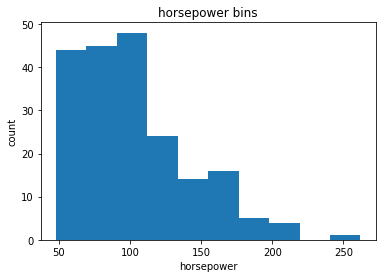

In [26]:
# convert to correct format
df["horsepower"]=df["horsepower"].astype(int, copy=True)

# plot the histogram to see the distribution
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's `linspace(start_value, end_value, numbers_generated)` function.

Since we want to include the minimum value of horsepower we want to set `start_value=min(df["horsepower"])`.

Since we want to include the maximum value of horsepower we want to set `end_value=max(df["horsepower"])`.

Since we are building 3 bins of equal length, there should be 4 dividers, so `numbers_generated=4`.

In [27]:
# set up the bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

# set up the group names
group_names = ['Low', 'Medium', 'High']

We apply the function `pd.cut` the determine what each value of `df['horsepower']` belongs to.

In [31]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
print (df[['horsepower','horsepower-binned']].head(20))

print ("\nThe number of vehicles in each bin are: ")
print (df["horsepower-binned"].value_counts())

    horsepower horsepower-binned
0          111               Low
1          111               Low
2          154            Medium
3          102               Low
4          115               Low
5          110               Low
6          110               Low
7          110               Low
8          140            Medium
9          101               Low
10         101               Low
11         121            Medium
12         121            Medium
13         121            Medium
14         182            Medium
15         182            Medium
16         182            Medium
17          48               Low
18          70               Low
19          70               Low

The number of vehicles in each bin are: 
Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


Let's plot the distribution of each bin.

Text(0.5,1,'horsepower bins')

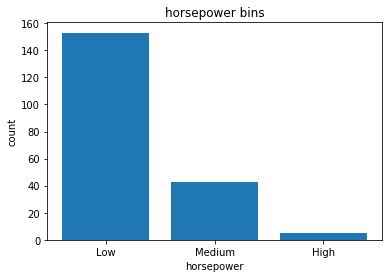

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High").

We successfully narrow the intervals from 57 to 3!

##### 5. Dummy variables

We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method `get_dummies` to assign numerical values to different categories of fuel type.

In [35]:
#use get_dummies
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

#change column names for clarity
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

print(dummy_variable_1.head())

#merge into df
df = pd.concat([df, dummy_variable_1], axis=1)

#drop the original categoric variables 'fuel-type'
df.drop("fuel-type", axis = 1, inplace=True)

print(df.head())

   diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1
   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length ...   \
0  convertible          rwd           front        88.6  0.811148 ...    
1  convertible          rwd           front        88.6  0.811148 ...    
2    hatchback          rwd           front        94.5  0.822681 ...    
3        sedan          fwd           front        99.8  0.848630 ...    
4        sedan          4wd           front        99.4  0.848630 ...    

   stroke  compression-ratio  ho

Do the same thing to "aspiration" variables.

In [36]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

<b> Finally, </b> save the new csv.

In [37]:
df.to_csv('clean_df.csv')